### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

# TP2 - Quantiles empiriques, théorème ergodique et splitting, estimation de densité

Les fonctions suivantes pourront être utiles dans ce TP (ne pas hésiter à exécuter `?NomDeLaFonction` pour afficher ce que fait la fonction):

> `np.linspace`, `np.arange`, `np.mean`, `np.std`, `np.logical_and`
> `plt.step`, `plt.plot`, `plt.hist`, `plt.legend`, `plt.axhline`, `plt.axvline`, `plt.axis`, `plt.ylim`

**Histogramme**. L'histogramme permet de visualier un estimateur d'une densité dont on dispose des réalisations i.i.d. $Y_1, \cdots, Y_m$. Pour représenter l'histogramme d'un échantillon de $m$ v.a., on pourra choisir environ $2m^{1/3}L_m / (7 \hat{\sigma}_m)$ subdivisions,  où $\hat{\sigma}_m$ est l'écart-type empirique  de l'échantillon et $L_m$ est la longueur de l'intervalle sur lequel s'étale l'échantillon (voir Exercice 4).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

### Partie 1. Théorème de Glivenko-Cantelli et quantiles empiriques

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\VR}{\operatorname{VaR}}$
$\newcommand{\eqdef}{:=}$
$\newcommand{\rmd}{\mathrm{d}}$
Soit une densité $f$ par rapport à la mesure de Lebesgue sur $\R$, supposée continue et strictement positive sur un intervalle $I$ (et nulle hors de $I$). 
La fonction de répartition associée est
$$
F(x) \eqdef  \int_{-\infty}^x f(u) \rmd u, \qquad x \in \R.
$$
Les hypothèses sur $f$ entrainent que la fonction $F:\R \rightarrow [0,1]$ est continue et strictement croissante sur $I$ (à cause des hypothèses sur $f$), on définit la fonction  quantile $Q : [0,1] \rightarrow \R \cup \{\pm \infty\} $ par:
$$
Q(0) \eqdef \inf I, \qquad  Q(u)\eqdef F^{-1}(u) \ \textrm{pour tout $u \in (0,1)$}, \qquad  Q(1)\eqdef\sup I.
$$
Entre autre en finance, on considère souvent la fonction $\operatorname{VaR}$ (pour *Value at Risk*) définie par
$$
\VR(\alpha) \eqdef Q(1-\alpha) \qquad
\quad  0<\alpha<1,
$$
où les valeurs considérées de $\alpha$ sont typiquement proches de zéro. Cette fonction est utilisée pour mesurer le risque: si  $f$ est la loi des pertes, $\VR(0.01)$ est la valeur des pertes qui n'est dépassée que dans 1\% des cas.

Dans cette partie, on considèrera successivement le cas où $f$  est la densité d'une loi

$-$ **gaussienne standard**, i.e. loi gaussienne centrée et de variance $1$. *Indications : On pourra utiliser la fonction `randn` de `numpy.random` pour  les simuler, et les fonctions `norm.cdf` et `norm.ppf` de `scipy.stats` pour obtenir les valeurs exactes de $F$ et $Q$.*

$-$  **loi gamma**. *Indications : On pourra utiliser les fonctions `numpy.random.gamma` et `scipy.stats.gamma` en choisissant leurs paramètres `shape` et `scale`*.


Le but de cette partie est d'estimer la fonction $Q$ à partir de $n$ réalisations $X_1, \ldots, X_n$, i.i.d. de densité $f$. Dans "la vraie vie", les variables aléatoires $X_1, \ldots, X_n$ peuvent être obtenues à l'aide de simulations (typiquement lorsque l'on veut calculer la fonction $\VR$ pour une loi $f$ spécifiée), ou être des observations historiques (par exemple, lorsque l'on veut calculer la fonction $\VR$ associée à une loi de perte dont on n'observe que des réalisations).

Etant donnée les réalisations $X_1, \cdots, X_n$, définissons la fonction de répartition empirique sur $\R$ 
$$
F_n(x) \eqdef \frac 1 n \sum_{i=1}^n 1_{X_i\leq x}, \qquad  x \in \R;
$$
et les statistiques d'ordre associées $(X_{(n,i)})_{1\leq i\leq n}$ : 
$$
X_{(n,1)} \leq X_{(n,2)} \leq \cdots \leq X_{(n,i)} \leq \cdots \leq X_{(n,n)}.
$$
À noter que ces inégalités sont strictes avec probabilité $1$ puisque les v.a. sont i.i.d. sous une loi à densité.

#### Question 1.1 (théorique)

Pour tout $x \in \R$, exprimer $F_n(x)$ à l'aide de $x$ et des statistiques d'ordre.

#### Question 1.2

Le théorème de Glivenko-Cantelli affirme que presque-sûrement, $\lim_n \sup_x |F_n(x)-F(x)| =0$. Illustrer graphiquement ce résultat lorsque l'échantillon $(X_1, \cdots, X_n)$ est i.i.d. de loi gaussienne standard, puis de loi gamma. 
*Indications : on pourra superposer $F$ et une réalisation de $F_n$ pour différentes valeurs de $n$*.

Question 1.2 Cas Gaussien


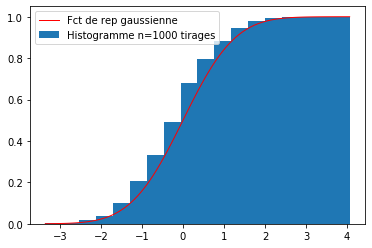

Question 1.2 Cas Gamma


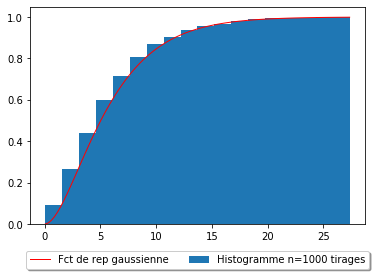

In [2]:
print("Question 1.2 Cas Gaussien")

## nombre de simulations
n = 1000######## A completer ######## 
## Gaussiennes centrees reduites
X = np.random.randn(n)######## A completer ######## 

plt.figure(1)
#Fct de repartition theorique
x = np.linspace(min(X),max(X),100)
F_x = sps.norm.cdf(x)######## A completer ######## 
plt.plot(x, F_x, "r", linewidth=1.0, label="Fct de rep gaussienne")

#Fct de repartition empirique

######## A completer ######## 
n_colonnes = 2 * int(n ** (1. / 3.))
plt.hist(X, bins=n_colonnes, density=True, cumulative=True, label="Histogramme n=%1.0f tirages" %n)

#On choisit la position de la legende
plt.legend(loc='best')
plt.show()


print("Question 1.2 Cas Gamma")

## Nombre de simulations
n = n######## A completer ######## 
## Parametres de la loi Gamma
shape=2
scale=3

X = np.random.gamma(shape=shape, scale=scale, size=n)

#Fct de repartition theorique
x = np.linspace(min(X),max(X),100)
F_x = sps.gamma.cdf(x, a=shape, scale=scale)######## A completer ######## 
plt.plot(x, F_x, "r", linewidth=1.0, label="Fct de rep gaussienne")

#Fct de repartition empirique

######## A completer ######## 
n_colonnes = 2 * int(n ** (1. / 3.))
plt.hist(X, bins=n_colonnes, density=True, cumulative=True, label="Histogramme n=%1.0f tirages" %n)



######## A completer ######## 

#On fait apparaitre la legende en dehors du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fancybox=True, shadow=True)
plt.show()

A la fonction de répartition empirique $F_n$, on associe la fonction _quantile empirique_ $Q_n$ définie  sur $(0,1)$ par $$ Q_n(u) \eqdef \inf\{x\in \R : u \leq F_n(x)\}.$$


#### Question 1.3 (théorique)

Soit $u \in (0,1)$. Montrer que que $Q_{n}(u)=X_{(n,\lceil nu \rceil)}$, où $\lceil y\rceil$ désigne la partie entière supérieure d'un réel $y$ (`numpy.ceil(y)`). 

#### Question 1.4 (théorique)

Montrer que  presque sûrement, pour  tout $u \in ]0,1[$, $\lim_n Q_n(u) = Q(u)$.


On peut démontrer (voir transparents de l'amphi) que pour tout $u \in (0,1)$,
$$
\sqrt{n}\frac{f(Q(u))}{\sqrt{u(1-u)}}\left(Q_{n}(u)-Q(u)\right) \quad  \stackrel{\text{loi}}{\longrightarrow} \quad  \mathcal{N}(0,1). \qquad \qquad (1)
$$
Cela signifie que, lorsque $n$ est grand, les fluctuations de  $Q_n(u)$ autour de  $Q(u)$ se comportent en loi comme une gaussienne centrée, d'écart-type d'ordre $\sqrt{u(1-u)} / (\sqrt{n} \, f(Q(u)))$. 

Pour utiliser ce résultat en pratique, on peut être confronté à deux difficultés dans le calcul de la renormalisation : le fait que $Q(u)$ n'est pas connu (on cherche à l'estimer), et le fait que la densité $f$ n'est pas toujours connue.

#### Question 1.5

Soit $u \in (0,1)$. Dans cette question, on s'autorise à utiliser le fait que $f$ est connue.  

1. Illustrer graphiquement la convergence presque sûre de la question 1.4 ainsi que la convergence en loi (1) dans le cas où $f$ est la densité d'une loi gaussienne standard, puis le cas d'une loi gamma.   Pour cette illustration numérique, on pourra se comparer à la valeur $Q(u)$ calculable pour les choix de $f$ considérés ici.

2. Déduire de la convergence en loi (1) l'expression d'un intervalle de confiance asymptotique de probabilité de couverture $95 \%$, de la quantité $Q(u)$ dans le cas où $f$ est connue, et illustrer numériquement le calcul de cet intervalle de confiance.

Question 1.5 cas Gaussien


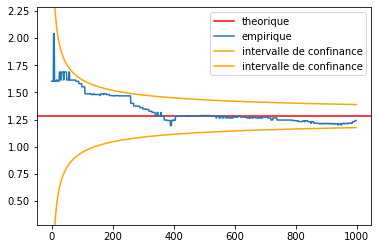

Question 1.5 cas Gamma 



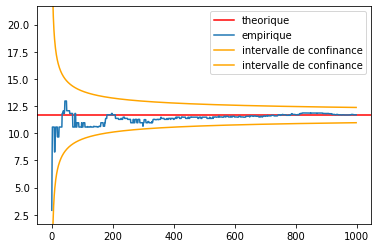

In [3]:
print("Question 1.5 cas Gaussien")

n=1000
u = 0.9
## Gaussiennes centrees reduites
X = np.random.randn(n)

res = [np.sort(X[:i])[int(np.ceil(u * i)) - 1] for i in range(1 ,n)]

plt.figure(1)
#Fct de repartition theorique
#x = np.linspace(min(X),max(X),100)
#plt.plot(x, F_x, "r", linewidth=1.0, label="Fct de rep gaussienne")

#Fct de repartition empirique

Q_u = sps.norm.ppf(u)
plt.axhline(Q_u, color='red', label='theorique')
plt.plot(res, label='empirique')

# Intervalle de confiance:
q = sps.norm.ppf(0.025)
bot = [Q_u + np.sqrt(u * (1 - u) / i) / sps.norm.pdf(Q_u) * q for i in range(1, n)]
top = [Q_u - np.sqrt(u * (1 - u) / i) / sps.norm.pdf(Q_u) * q for i in range(1, n)]
plt.plot(bot, color='orange', label='intervalle de confinance')
plt.plot(top, color='orange', label='intervalle de confinance')


#On choisit la position de la legende
plt.ylim(Q_u - 1, Q_u + 1)
plt.legend(loc='best')
plt.show()


print("Question 1.5 cas Gamma \n")
## Nombre de simulations
n = n
## Parametres de la loi Gamma
shape=2
scale=3

X = np.random.gamma(shape=shape, scale=scale, size=n)

res = [np.sort(X[:i])[int(np.ceil(u * i)) - 1] for i in range(1 ,n)]

plt.figure(1)
#Fct de repartition empirique

######## A completer ######## 
Q_u = sps.gamma.ppf(u, a=shape, scale=scale)
plt.axhline(Q_u, color='red', label='theorique')
plt.plot(res, label='empirique')

# Intervalle de confiance:
q = sps.norm.ppf(0.025)
bot = [Q_u + np.sqrt(u * (1 - u) / i) / sps.gamma.pdf(Q_u, a=shape, scale=scale) * q for i in range(1, n)]
top = [Q_u - np.sqrt(u * (1 - u) / i) / sps.gamma.pdf(Q_u, a=shape, scale=scale) * q for i in range(1, n)]
plt.plot(bot, color='orange', label='intervalle de confinance')
plt.plot(top, color='orange', label='intervalle de confinance')


#On choisit la position de la legende
plt.ylim(Q_u - 10, Q_u + 10)

#On choisit la position de la legende
plt.legend(loc='best')
plt.show()

***
$\newcommand{\Var}{\operatorname{Var}}$


Dans les cas où $f$ n'est pas connue, le TCL rappelé à la question 1.4 ne peut pas être utilisé. L'objectif de la question suivante est d'établir une autre technique pour le calcul d'un intervalle de confiance asymptotique pour $Q(u)$.

#### Question 1.6

1. Montrer que  pour tout $u \in (0,1)$, 
$$ \sqrt{n} (F_n(Q(u))- u)  \stackrel{loi}{\longrightarrow}  \mathcal{N}(0,u(1-u)).$$

2. Soit $\alpha \in (0,1)$; on pose
$$  \alpha^-_n \eqdef 1-\alpha  - 1.96  \,  \frac{\sqrt{\alpha(1-\alpha)}}{\sqrt{n}}, \qquad \alpha^+_n \eqdef 1-\alpha  + 1.96 \,  \frac{\sqrt{\alpha(1-\alpha)}}{\sqrt{n}}.$$ 
Montrer que $[Q_n(\alpha_n^-),Q_n(\alpha_n^+)]$ est un intervalle de confiance asymptotique de probabilité de couverture  $95\%$ pour $\VR(\alpha)$.

3. Illustrer numériquement ce calcul d'intervalle de confiance pour $\alpha=10^{-1}, \alpha=10^{-5}$. On simulera également 100 réalisations de cet intervalle de confiance et on affichera l'évolution de la proportion contenant la vraie valeur $\VR(\alpha)$ en fonction de $n$.


*** Question 1.6 Cas Gaussien *** 

Intervalle de confiance pour alpha=0.100000


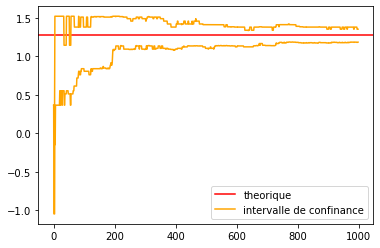

0.93 pourcent de realisations contient VaR(alpha)
Intervalle de confiance pour alpha=0.000010


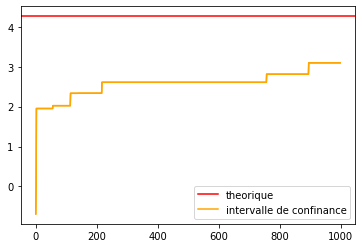

0.0 pourcent de realisations contient VaR(alpha)
***Question 1.6 cas Gamma  ***

Intervalle de confiance pour alpha=0.100000


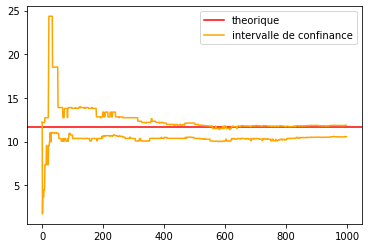

0.95 pourcent de realisations contient VaR(alpha)
Intervalle de confiance pour alpha=0.000010


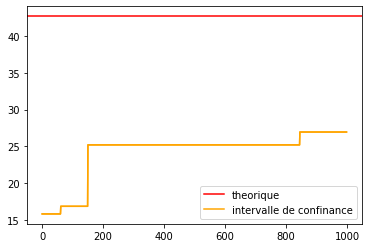

0.0 pourcent de realisations contient VaR(alpha)


In [4]:
def a_moins(alpha, n):
    return 1 - alpha - 1.96 * np.sqrt(alpha * (1 - alpha) / n)

def a_plus(alpha, n):
    return 1 - alpha + 1.96 * np.sqrt(alpha * (1 - alpha) / n)


print("*** Question 1.6 Cas Gaussien *** \n")
n = 1000
N = 100
alpha = 10 ** (-1)
VaR_alpha = sps.norm.ppf(1 - alpha)

print("Intervalle de confiance pour alpha=%1.6f" %alpha)
X = np.random.randn(n)

plt.figure(1)
plt.axhline(VaR_alpha, color='red', label='theorique')

# Intervalle de confiance:
bot = [np.sort(X[:i])[int(np.ceil(a_moins(alpha, i) * i) - 1)] for i in range(1, n)]
top = [np.sort(X[:i])[int(np.ceil(a_plus(alpha, i) * i) - 2)] for i in range(1, n)]
plt.plot(bot, color='orange')
plt.plot(top, color='orange', label='intervalle de confinance')


#On choisit la position de la legende
plt.legend(loc='best')
plt.show()

X = np.random.randn(N, n)
bot = np.sort(X, axis=1)[:, int(a_moins(alpha, n) * n)]
top = np.sort(X, axis=1)[:, int(a_plus(alpha, n) * n)]
print(str(((bot <= VaR_alpha) * (top >= VaR_alpha)).mean()) + " pourcent de realisations contient VaR(alpha)")

################## alpha=0.00001
alpha = 10 ** (-5)
VaR_alpha = sps.norm.ppf(1 - alpha)

print("Intervalle de confiance pour alpha=%1.6f" %alpha)
X = np.random.randn(n)

plt.figure(1)

plt.axhline(VaR_alpha, color='red', label='theorique')

# Intervalle de confiance:
bot = [np.sort(X[:i])[int(np.ceil(a_moins(alpha, i) * i) - 1)] for i in range(1, n)]
top = [np.sort(X[:i])[int(np.ceil(a_plus(alpha, i) * i) - 2)] for i in range(1, n)]
plt.plot(bot, color='orange')
plt.plot(top, color='orange', label='intervalle de confinance')

#On choisit la position de la legende
plt.legend(loc='best')
plt.show()

X = np.random.randn(N, n)
bot = np.sort(X, axis=1)[:, int(a_moins(alpha, n) * n)]
top = np.sort(X, axis=1)[:, int(a_plus(alpha, n) * n - 1)]
print(str(((bot <= VaR_alpha) * (top >= VaR_alpha)).mean()) + " pourcent de realisations contient VaR(alpha)")


print("***Question 1.6 cas Gamma  ***\n")
n = 1000
N = 100
## Parametres de la loi Gamma
shape=2
scale=3

alpha = 10 ** (-1)
VaR_alpha = sps.gamma.ppf(1 - alpha, a=shape, scale=scale)

print("Intervalle de confiance pour alpha=%1.6f" %alpha)
X = np.random.gamma(shape=shape, scale=scale, size=n)

plt.figure(1)
plt.axhline(VaR_alpha, color='red', label='theorique')

# Intervalle de confiance:
bot = [np.sort(X[:i])[int(np.ceil(a_moins(alpha, i) * i) - 1)] for i in range(1, n)]
top = [np.sort(X[:i])[int(np.ceil(a_plus(alpha, i) * i) - 2)] for i in range(1, n)]
plt.plot(bot, color='orange')
plt.plot(top, color='orange', label='intervalle de confinance')


#On choisit la position de la legende
plt.legend(loc='best')
plt.show()

X = np.random.gamma(shape=shape, scale=scale, size=(N, n))
bot = np.sort(X, axis=1)[:, int(a_moins(alpha, n) * n)]
top = np.sort(X, axis=1)[:, int(a_plus(alpha, n) * n - 1)]
print(str(((bot <= VaR_alpha) * (top >= VaR_alpha)).mean()) + " pourcent de realisations contient VaR(alpha)")

################## alpha=0.00001
alpha = 10 ** (-5)
VaR_alpha = sps.gamma.ppf(1 - alpha, a=shape, scale=scale)

print("Intervalle de confiance pour alpha=%1.6f" %alpha)
X = np.random.gamma(shape=shape, scale=scale, size=n)

plt.figure(1)
plt.axhline(VaR_alpha, color='red', label='theorique')

# Intervalle de confiance:
bot = [np.sort(X[:i])[int(np.ceil(a_moins(alpha, i) * i) - 1)] for i in range(1, n)]
top = [np.sort(X[:i])[int(np.ceil(a_plus(alpha, i) * i) - 2)] for i in range(1, n)]
plt.plot(bot, color='orange')
plt.plot(top, color='orange', label='intervalle de confinance')


#On choisit la position de la legende
plt.legend(loc='best')
plt.show()

X = np.random.gamma(shape=shape, scale=scale, size=(N, n))
bot = np.sort(X, axis=1)[:, int(a_moins(alpha, n) * n)]
top = np.sort(X, axis=1)[:, int(a_plus(alpha, n) * n - 1)]
print(str(((bot <= VaR_alpha) * (top >= VaR_alpha)).mean()) + " pourcent de realisations contient VaR(alpha)")

Une fois la *Value at Risk* estimée, il est parfois intéressant d'estimer l'*Expected Shortfall*, qui se définit comme étant l'espérance conditionnelle de queue $$E_{\alpha}\eqdef \mathbb{E}[X_1\,|\, X_1> Q(1-\alpha)] = \mathbb{E}[X_1\,|\, X_1> \VR(\alpha)]. $$ 

#### Question 1.7

Dans le cas où $f$ est la loi gaussienne centrée réduite, puis dans le cas où $f$ est la loi gamma : donner un intervalle de confiance asymptotique de probabilité de couverture  $95\%$ pour l'expected shortfall. 

On pourra utiliser le fait que les variables aléatoires $\{X_i: X_i > X_{(n,\lceil n(1-\alpha)\rceil)} \}$ satisfont à un théorème central limite (voir par exemple le Théorème 4.1 (iii) page 80 [dans cette thèse](https://tel.archives-ouvertes.fr/tel-00743159/document) pour une preuve).

Dans le cas de la loi gaussienne centrée réduite, on pourra évaluer la qualité de l'intervalle de confiance en utilisant le fait que 
$$ E_\alpha =  \frac{f(\Phi^{-1}(1-\alpha))}{\alpha}
$$
où $\Phi$ désigne la fonction de répartition d'une loi gaussienne centrée réduite. 

In [5]:
alpha = 1e-1
print("*** Question 1.7 : cas Gaussien*** \n")
VaR_alpha = sps.norm.ppf(1 - alpha)




print ("*** Question 1.7 : cas Gamma*** \n")
VaR_alpha = sps.gamma.ppf(1 - alpha, a=shape, scale=scale)


*** Question 1.7 : cas Gaussien*** 

*** Question 1.7 : cas Gamma*** 



***
***
### Partie 2. Estimation paramétrique
***
***

En estimation paramétrique, on se pose la question de trouver la loi, dans un modèle statistique paramétrique, qui s'ajuste au mieux aux mesures disponibles.  On modélise des mesures $x_{1}, \ldots,x_{n}$ comme la réalisation d'un vecteur aléatoire $(X_{1}, \ldots,X_{n})$; dans la suite, on considèrera que l'on a un $n$-échantillon du modèle statistique  
$$(\R, \mathcal{B}(\R), \{ \mathcal{N}(0,\sigma^2), \sigma^2 > 0 \}). $$


On rappelle que la variance d'une loi $\mathcal{N}(0, \sigma^2)$ est $\sigma^{2}$ et que son moment d'ordre $4$ vaut $3 \sigma^4$. On notera $\overline{X^2_n} \eqdef \frac1{n}\sum_{i=1}^n X_i^2$.


#### Question 2.1 ####
Le but de cette question est d'estimer $\sigma$ à partir de l'observation de $X_1, \ldots, X_n$. 

#### a) ####
 Écrire un programme donnant un intervalle de confiance (non asymptotique)
de probabilité de couverture  $95\%$   pour $\sigma$. *Indication : on pourra utiliser la loi du $\chi^{2}$ et la fonction `sps.chi2.ppf`)*.

In [6]:
print ("*** Question 2.1 *** \n")

#####################
## IC non asymptotique
#####################
print(np.sqrt(sps.chi2.ppf(0.025, 2)), np.sqrt(sps.chi2.ppf(0.975, 2)))

*** Question 2.1 *** 

0.2250235898046686 2.7162030314812387


#### b) (théorique) ####
Démontrer que  $\sqrt{n} \left(  \sqrt{\overline{X^2_n} }-\sigma \right)  \stackrel{loi}{ \rightarrow}  \mathcal{N}(0,\sigma^{2}/2)$. *Indication : on pourra appliquer la méthode Delta*.


#### c) #### 
Écrire un programme donnant un intervalle de confiance asymptotique de probabilité de couverture  $95\%$ pour $\sigma$.

In [7]:
#####################
## IC asymptotique
#####################
n = int(1e6)
sigma_theorique = 0.3

X = sigma_theorique * np.random.randn(n)

sigma = np.sqrt((X * X).mean())
n = len(X)
quantile = sps.norm.ppf(0.025, scale=sigma_theorique)
print(sigma + np.sqrt(2 / n) / sigma * quantile, sigma - np.sqrt(2 / n) / sigma * quantile )

0.29732399590194725 0.3028658576293147


***
#### Question 2.2 ####

Toujours dans un modèle gaussien centré, on cherche maintenant à estimer, comme dans l'exercice précédent, le quantile de niveau $u$. Comparer, pour différentes valeurs de $n$, 


1. la valeur exacte du quantile.

2. la valeur obtenue en estimant $\sigma$ puis en utilisant `scipy.stats.norm.ppf`. Pour cela, en notant $Q(u,\sigma)$ le quantile en $u$ de $ \mathcal{N}(0,\sigma^{2})$,  on admettra que
$$\sqrt n \left(Q \left( u,\sqrt{\overline{X^2_n}} \right)  - Q(u,\sigma) \right)
 \stackrel{loi}{\longrightarrow} \mathcal{N} \left(0, \frac{Q(u,\sigma)^2}2 \right).  \qquad \qquad (2)
$$


3. la valeur obtenue en utilisant la question 1.5 de la Partie 1.

4. la valeur obtenue en utilisant la question 1.6 de la Partie 1.

On pourra faire cette expérience pour des valeurs de $u$ proches de $1$.

In [8]:
print ("*** Question 2.2 *** \n")
u = 0.9
sigma_theorique = 0.3

val_ext = sps.norm.ppf(u, scale=sigma_theorique)
print("Valeur exacte: {}".format(val_ext))

# Realisation
n = int(1e6)
X = sigma_theorique * np.random.randn(n)
sigma = np.sqrt((X * X).mean())

print("Sigma estimee: {}".format(sigma))
print("u estimee: {}".format(sps.norm.ppf(u, scale=sigma)))



*** Question 2.2 *** 

Valeur exacte: 0.3844654696633801
Sigma estimee: 0.30016381272413545
u estimee: 0.384675404116452


***
#### Question 2.3  (facultative) ####
Démontrer la convergence en loi (2) apparaissant dans la Question 2.2.

***
***
### Partie 3. Théorème ergodique et méthode de splitting
***
***


#### A. Théorème ergodique pour le processus $\operatorname{AR}(1)$ stationnaire ####

Un processus $\operatorname{AR}(1)$ stationnaire est défini par récurrence comme suit (pour simplifier, on se place en dimension $1$).  On fixe $\rho\in ]-1,1[$, on choisit $X_0\sim \mathcal{N}(0, 1)$ et on pose, pour $i\ge 1$,
$$
X_i := \rho X_{i-1}+\sqrt{1-\rho^2}  Y_i, \qquad \qquad \qquad (3)
$$
où $(Y_i)_{i\ge 1}$ est une suite de variables aléatoires i.i.d.~de loi 
$\mathcal{N}(0, 1)$, indépendante de $X_0$.
C'est donc un processus qui se renouvelle d'un instant à l'autre en gardant une part de son ancienne valeur ($\rho X_{i-1}$) et en ajoutant une part d'_innovation_ ($\sqrt{1-\rho^2} Y_i$).
On vérifie facilement que pour tout $i$, 
$$
X_i\;=\;\rho^iX_0+\sqrt{1-\rho^2}\sum_{j=1}^{i}\rho^{i-j}Y_{j}\;\sim\; \mathcal{N}(0, 1). \qquad \qquad \qquad (4)
$$
(Attention: l'expression de $X_i$ dans l'équation (4) permet des calculs plus rapides que (3) en utilisant les fonctions de `numpy` plutôt que des boucles, mais peut mener à des problèmes numériques et à des blocages (`nan`), lorsque $i\gg 1$, si elle amène à calculer des expressions du type $\rho^{\pm \textrm{(très grand nombre)}}$. Nous déconseillons son usage.)

Le  _théorème ergodique_ affirme que 
pour tout  $B\subset \R$ mesurable, presque sûrement, 
$$\frac{1}{n}\sum_{i=1}^n 1_{X_i\in B} \quad \mathop{\longrightarrow}_{n \to \infty}  \quad \mathbb{P}(Z\in B), \qquad \textrm{où } Z \sim \mathcal{N}(0,1) . \qquad \qquad \qquad (5)$$
Concrètement, pour $n\gg 1$, l'histogramme de $X_1, \ldots, X_n$ est proche de la densité de $\mathcal{N}(0, 1)$. Notons que de ce point de vue, les choses se passent comme si les $X_i$ étaient des variables aléatoires i.i.d.~de loi  $\mathcal{N}(0, 1)$ (auquel cas cette convergence découlerait de la LGN).

##### Question 3.1 ####
Illustrer cette convergence par un programme

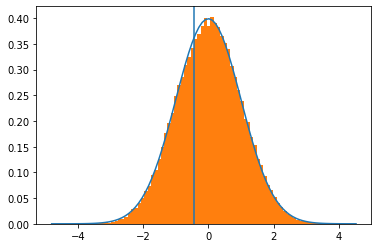

In [9]:
#### Question 3.1 ####
rho = 0.9
n = int(1e5)
X0 = np.random.randn()
Y = np.random.randn(n)

X = []
val = X0
for i in range(n):
    val = val * rho + np.sqrt(1 - rho * rho) * Y[i]
    X.append(val)

X = np.array(X)
    
n_columns = int(2 * n ** (1 / 3))
x = np.linspace(X.min(), X.max(), n_columns)
f_x = sps.norm.pdf(x, loc=0, scale=1)
plt.plot(x, f_x)
plt.hist(X, bins = n_columns, density=True, label='empirique')
plt.axvline(X0)
plt.show()

***
#### B. Théorème ergodique et méthode de splitting pour le processus $\operatorname{AR}(1)$ ####


Il se trouve que si l'on modifie la dynamique du processus $X$ dans (3) en conditionnant à l'appartenance à un ensemble mesurable $A\subset \R$,  la convergence (5) reste valable (au sens conditionnel). Plus précisément, pour $A\subset \R$ de mesure de Lebesgue strictement positive, en choisissant $X_0^A$ de  loi gaussienne centrée réduite conditionnée à appartenir à $A$, et en posant, pour $i\ge 1$,
\begin{equation}\label{eqAR(1)2}X_i^A := \begin{cases}\rho X_{i-1}^A+\sqrt{1-\rho^2} Y_i &\textrm{ si $\rho X_{i-1}^A+\sqrt{1-\rho^2} Y_i\in A$,}\\ X_{i-1}^A&\textrm{ sinon,}\end{cases} \qquad \qquad (6)
\end{equation} où $(Y_i)_{i\ge 1}$ est une suite de variables aléatoires i.i.d.~de loi 
$\mathcal{N}(0, 1)$, indépendante de $X_0^A$, on a :

1. pour tout $i \geq 0$, $X_i^A$ suit la loi gaussienne centrée réduite conditionnée à appartenir à $A$,

2. le _théorème ergodique_ reste valable: pour tout $B\subset \R$  mesurable,  presque sûrement
\begin{equation}\label{eqAR(1)TE2}
\frac{1}{n}\sum_{i=1}^n 1_{X_i^A\in B}  \quad \mathop{\longrightarrow}_{n \rightarrow \infty} \quad \mathbb{P}(Z\in B \,|\, Z\in A)\qquad \qquad (7)\end{equation}
où $Z\sim \mathcal{N}(0, 1)$.

#### Question 3.2 ####
Illustrer la convergence (7) avec un programme (on pourra prendre $A=[a,+\infty[$).

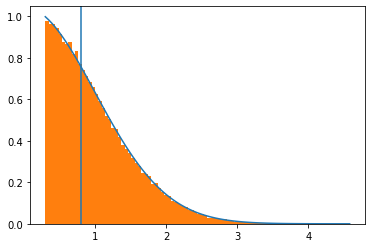

In [10]:
#### Question 3.2 ####
a = 0.3

rho = 0.9
n = int(1e5)
X0 = a + 0.5
Y = np.random.randn(n)

X = []
val = X0
for i in range(n):
    val_tmp = val * rho + np.sqrt(1 - rho * rho) * Y[i]
    if val_tmp > a:
        val = val_tmp
    X.append(val)

X = np.array(X)
    
n_columns = int(2 * n ** (1 / 3))
x = np.linspace(X.min(), X.max(), n_columns)
f_x = sps.norm.pdf(x, loc=0, scale=1) / sps.norm.sf(a, loc=0, scale=1)
plt.plot(x, f_x)
plt.hist(X, bins = n_columns, density=True, label='empirique')
plt.axvline(X0)
plt.show()

***

Pour calculer $\mathbb{P}(Z\in A)$, l'idée du _splitting_ est alors d'utiliser une suite décroissante de "cibles"
$\mathbb{R}=A_0\supset A_1\supset\cdots\supset A_k=A$
et de calculer $\mathbb{P}(Z\in A)$ avec la formule 
\begin{equation} 
\mathbb{P}(Z\in A)=\prod_{\ell=1}^k \mathbb{P}(Z\in A_{\ell}\,|\, Z\in A_{\ell-1}) \qquad \qquad (8)
\end{equation}
où chaque probabilité conditionnelle est approchée via (7).


#### Question 3.3 ####
Illustrer cette méthode avec le calcul de $\mathbb{P}(Z>a)$ pour $Z\sim \mathcal{N}(0,1)$ et $a=5$.
La valeur de cette probabilité est bien évidemment connue (et accessible via les fonctions `scipy.stats.norm.pdf` ou `scipy.stats.norm.sf`).
On souhaite ici tester les performances d'un algorithme d'estimation basé sur la représentation (8) et sur le résultat de convergence (7), dans un cas simple.

1. En utilisant un nombre $n$ de tirages pas très élevé ($n=500$ ou $n=1000$ par exemple), on estime des valeurs
$$
-\infty=a_0<a_1<\cdots <a_k=a
$$
telles que pour tout $\ell$,
$$
\mathbb{P}(Z>a_\ell\,|\,Z>a_{\ell-1})
\simeq 0.1.
$$
Pour cela, on pourra admettre que les théorèmes limites de la Partie 1 restent vrais.

2. On estime alors chacune des probabilités conditionnelles $\mathbb{P}(Z>a_\ell\,|\,Z>a_{\ell-1})$ via une méthode encore fondée sur (7), en utilisant maintenant un nombre de tirages plus élevé (nous conseillons ici $n=5.10^4$ et $\rho=0.7$).

3. On en déduit  $\mathbb{P}(Z>a)$ via la formule (8), et on compare le résultat obtenu  à la valeur approchée obtenue par un Monte-Carlo simple réalisé avec autant de simulations (càd avec $n \, k$ simulations), ainsi qu'à la valeur exacte donnée par la fonction `scipy.stats.norm.sf` (pour mesurer la qualité d'une estimation $p'$ d'un nombre $p>0$, on utilise souvent l'erreur relative en pourcentage $100 \frac{|p-p'|}{p}$).


In [11]:
#### Question 3.3 ####
a = 5
rho = 0.7

# Create a0, a1, ...ak
n = 1000
X = np.sort(np.random.randn(n))

a_list = [-100]
while len(X) > 1:
    n = len(X)
    a_temp = X[int(0.9*n)]
    X = X[int(0.9*n):]
    a_list.append(a_temp)
a_list.append(5)
print(a_list)

# Evaluer les probas
n = int(5e4)
P = []
for i in range(len(a_list) - 1):
    X0 = a_list[i]
    Y = np.random.randn(n)
    X = []
    val = X0

    for j in range(n):
        val_tmp = val * rho + np.sqrt(1 - rho * rho) * Y[j]
        if val_tmp > a_list[i]:
            val = val_tmp
        X.append(val)

    X = np.array(X)
    P.append((X > a_list[i + 1]).mean())
print(P)

# Produit de proba
prod = 1
for i in P:
    prod *= i

print("valeur theorique: \t{}".format(sps.norm.sf(5)))
print("valeur estimee: \t{}".format(prod))

print("Erreur: \t{}%".format(np.abs(sps.norm.sf(5) - prod) / sps.norm.sf(5) * 100))

n = n * (len(a_list) - 1)
X = np.random.randn(n)
print("Monte Carlo: {}".format((X > a).mean()))

[-100, 1.3764459783692409, 2.5685673139341794, 3.0717653307959485, 5]
[0.08452, 0.06026, 0.20374, 0.00018]
valeur theorique: 	2.866515718791933e-07
valeur estimee: 	1.8678303274464003e-07
Erreur: 	34.839697016084024%
Monte Carlo: 0.0


In [12]:
n = int(1e6)

***
***
### Partie 4. Estimation de la densité
***
***

Dans ce paragraphe, on considère une suite $(X_i)_{i\ge 1}$ de aléatoires i.i.d.~dont on suppose qu'elles ont une densité $f$ sur $\R$. Afin d'estimer $f$, pour chaque valeur de $n$, on va construire, à partir des observations $X_1, \ldots, X_n$, une densité $f_n$.
Cette densité pourra, selon la stratégie choisie, être construite via différents procédés, et on verra dans quelle mesure, pour $x\in \R$,
$$
f_n(x)\underset{n\to\infty}{\longrightarrow} f(x).
$$


#### A. Histogramme ####

Pour chaque valeur de $n$, on fixe une subdivision $\cdots<a_{n,-1}<a_{n,0}<a_{n,1}<\cdots$ de $\R$, et $f_n$ est la fonction constante sur chaque intervalle $]a_{n,k-1}, a_{n,k}]$ telle que  pour tout $k$,
$$
\int^{a_{n,k}}_{a_{n,k-1}}f_n(x)\textrm{d} x
=
\frac{\textrm{Card}\{i\in \{1, \ldots, n\}: a_{n,k-1} < X_i\le a_{n,k}\}}{n}.
$$

Rappelons que dans `matplotlib.pylot`, la fonction `hist` trace un histogramme selon ce procédé: pour `V` un vecteur de données, on peut tracer  l'histogramme de `V` selon deux modes: 

1. Pour tout entier `n`, la commande `hist(V,bins=n)` (ou simplement `hist(V,n)`) trace l'histogramme associé à la subdivision régulière à `n` intervalles, allant du plus petit élément de `V` au plus grand.

2. On peut aussi prescrire la subdivision utilisée dans le traçage de l'histogramme en remplaçant l'argument `n` par une subdivision (i.e. un vecteur de réels croissants sous la forme d'un \src{list} ou d'un `numpy.array`). Dans ce cas, les valeurs de `V` qui sont hors des bornes de la subdivision ne sont pas prises en compte.


#### B. Fenêtres glissantes ####
 Pour chaque valeur de $n$, on fixe $h_n>0$ (la _largeur de fenêtre_) et on définit la densité $f_n$ par la formule :
 $$\label{def_fenetre_gli}\forall x\in \R, \qquad f_n(x) := \frac{\textrm{Card}\{i\in \{1, \ldots, n\}: x-\frac{h_n}{2}< X_i\le x+\frac{h_n}{2}\}}{nh_n}. \qquad \qquad (9)
 $$

#### C. Comment choisir la largeur des colonnes de l'histogramme ou des fenêtres glissantes ? ####

On unifie les approches des deux paragraphes précédents en notant $f_n$ la densité empirique construite soit via l'approche "histogramme", soit via l'approche "fenêtres glissantes", i.e. par la formule (9).

Il est facile d'imaginer ce qu'il se produit si l'histogramme a trop peu de colonnes ou si les fenêtres glissantes sont trop larges: l'approximation de la densité qui en résulte est très grossière. 

Néanmoins, augmenter le nombre de colonnes excessivement ou   affiner les  fenêtres glissantes à l'extrême ne produit pas non plus une bonne approximation de la densité. 

***
#### Question 4.1 ####

$\blacktriangle$ Illustrer les deux assertions précédentes (pour l'approche  _histogramme_ uniquement) avec une simulation  : on tire $n$ aléatoires i.i.d. ayant une densité $f$ (par exemple des gaussiennes standard) et on compare la densité $f$ à son approximation via un histogramme en choisissant soit très peu, soit beaucoup  de colonnes.

$\blacktriangle$ La question du choix optimal pour la largeur des colonnes (ou des fenêtres) est délicate, notamment car sa réponse dépend fortement de l'information disponible quant à la densité $f$ à approcher.
Dans l'article [Sco 79], il est suggéré d'utiliser une largeur de colonne égale à $a\sigma n^{-1/3}$, où $a=3.49$, $\sigma$ est l'écart-type  de l'échantillon et $n$ est la taille de l'échantillon  (dans le cas de la densité gaussienne, ce choix minimise une erreur quadratique). Cela signifie que si notre échantillon s'étale sur un intervalle de longueur $L$, notre histogramme devra avoir $N\approx n^{1/3}L/(a\sigma)$ colonnes. Illustrer cette affirmation avec des simulations  de variables aléatoires i.i.d. suivant diverses lois.

[Sco 79] David W. Scott. _On optimal and data-based histograms_. Biometrika 66, 605--610, 1979.

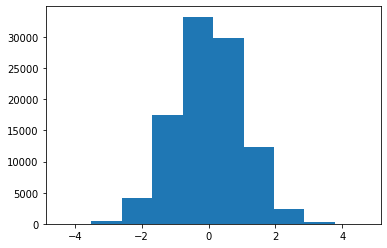

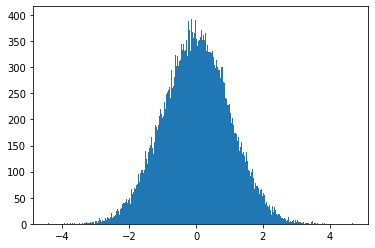

In [13]:
### Question 4.1 ###
n = int(1e5)
X = np.random.randn(n)
plt.hist(X, 10)
plt.show()

plt.hist(X, 1000)
plt.show()

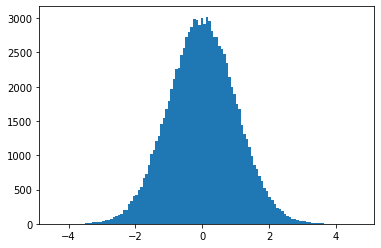

In [14]:
a = 3.49
L = X.max() - X.min()
plt.hist(X, int(n ** (1 / 3) * L / a / 1))
plt.show()